## Data science challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Report_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data analysis and visualisation</u>](#datavis)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Prediction challenge</u>](#prediction)
    - [3.1: <u>The expected revenue (gross)</u>](#gross)
    - [3.2: <u>IMDb score (score)</u>](#score) 
- [Part 4: <u>Exploratory component</u>](#explore)
    - [4.1: <u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>](#q1)
    - [4.2: <u>How does the underlying structure of movie stars network correlates to the successes of movies?</u>](#q2)
- [Part 5: <u>Conclusion</u>](#conc)

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

When talking about movie productions in the West, US always come up as the center having one of the largest revenue in the motion picture industry. The movies produced in the US has since last century gained wide range of dedicated audience around the world and US customers are also great contributors to many movies' international box office successes, especially with the power of Hollywood. With successful movies comes movie stars, directors, writers, and because of them one attracts more audience to walk into the cinemas and buy more movie tickets. Movie ratings also became an important metric people use to make decisions of whether to watch a movie or not, which in term are often directly linked to the movie's box office success. In this project we aim to predict the successes of movies released in the US from 1980 to 2020 in terms of their expected revenue and IMDb score, as well as exploring into the impact of major economic crisis on financial revenue of motion picture industry in US and how the structure of movie stars network potentially correlates to success of movies.

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data) as a starting point. The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. It is note that the original structure of the dataset is not as "comprehensive" as it claims by the title, therefore we have reconstructed the dataset into a new format that will be more efficient to use for the purpose of our investigation. The main goal of restructuring the dataset is to have unique movies as observations/rows and provide more effective overview of various attributes describing each movie. The detailed cleaning and data augmentation process can be seen in the appendix. Below is the features table that are included in the preprocessed dataset. 

| Feature        | Description                                                                         | Type                 |
|----------------|-------------------------------------------------------------------------------------|----------------------|
| title_year     | Combination of title of the movie and the year the movie was released               | Discrete -> nominal  |
| title          | Title of the movie                                                                  | Discrete -> nominal  |
| rating         | MPAA (Motion Picture Association of America film rating) of the movie               | Discrete -> nominal  |
| region         | Region of release of the movie                                                      | Discrete -> nominal  |
| released       | Release date of the movie                                                           | Discrete -> interval |
| year           | Year of the movie release                                                           | Discrete -> interval |
| month          | Month of the movie release                                                          | Discrete -> ordinal  |
| day            | Day of the movie release                                                            | Discrete -> interval |
| score          | IMDb score of the movie                                                             | Continuous -> ratio  |
| director       | Directors of the movie                                                              | Discrete -> nominal  |
| writer         | Writers of the movie                                                                | Discrete -> nominal  |
| star           | Stars (main actor/actress) of the movie                                             | Discrete -> nominal  |
| country        | Country of the production of the movie                                              | Discrete -> nominal  |
| budget         | Budget of the movie in $1mm                                                         | Continuous -> ratio  |
| gross          | Gross of the movie in $1mm                                                          | Continuous -> ratio  |
| company        | Production company of the movie                                                     | Discrete -> nominal  |
| runtime        | Runtime of the movie in minutes                                                     | Continuous -> ratio  |
| primaryName    | List of name of people who worked on the movie                                      | Discrete -> nominal  |
| category       | Dictionary of type of credit/role the persons in primaryNames had for the movie     | Discrete -> nominal  |
| nconst         | Dictionary of person ID in IMDb's relational database for names in primaryNames     | Discrete -> nominal  |
| knownForTitles | Dictionary of primaryNames mapped to the list of movie title IDs they are known for | Discrete -> nominal  |
| Profit         | Profit of the movie (Gross-Budget) in $1mm                                          | Continuous -> ratio  |
| released_2     | Release year and month of the movie                                                 | Discrete -> interval |
| continent      | Continent of where the movie is produced                                            | Discrete -> nominal  |
| duration       | Duration of the movie defined as (Long, Short)                                      | Discrete -> ordinal  |

---
<a id='datavis'></a>
## Part 2: _<u>Data analysis and visualisation</u>_


For this section we will use the original dataframe with the missing values. Additionally we will add columns  _title_year_ and  _Protif_ to the dataframe.


In [39]:
df = pd.read_csv('Comprehensive IMDb Data.csv')
print(f"The dataset has {df.shape[0]} observations divided into {len(set(df['title']))} unique movies, {df.shape[1]} features columns\
 and {sum(df.isna().sum())} missing values.")

The dataset has 222569 observations divided into 7107 unique movies, 22 features columns and 64146 missing values.



As we saw earlier there are more observations than unique movies, thus for a fair comparison we will create a dataframe where there is only one observation per movie. For our prediction challenge we will be predicting gross and score, so let us have a look the distribution for these features.


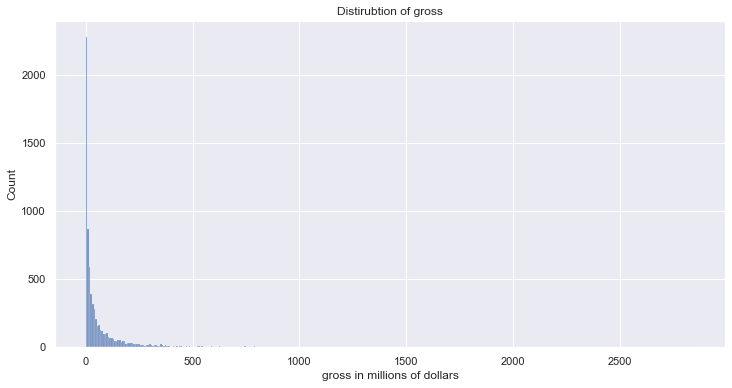

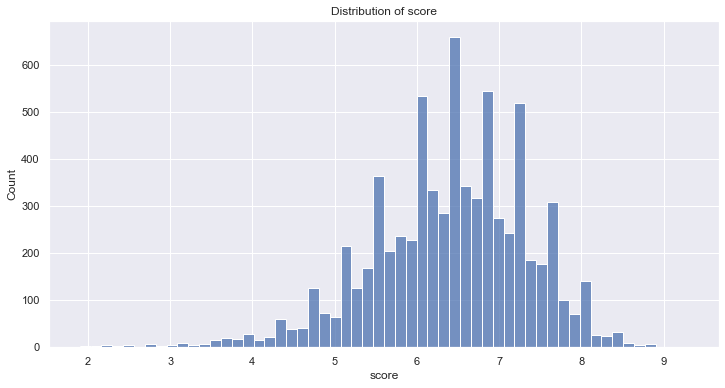

In [40]:
df_unique = data_add_features(df)
vis_gross_score(df_unique)

We see that most of the movies have a gross of under 250 million, with some extreme outliers very high values of gross. For scores we see that majority of the score is around 6.5 with some outliers that contributed to the slightly left skewed distribution. When we are looking at the movies with the highest score, gross and profit we find that most of the movies are well known. 


In [41]:
top_movies(df_unique)

,title_year,Profit
0,Avatar_2009,2610.246203
1,Avengers: Endgame_2019,2441.501328
2,Titanic_1997,2001.647264
3,Avengers: Infinity War_2018,1727.359754
4,Jurassic World_2015,1520.516444
5,The Lion King_2019,1410.727580
6,Furious 7_2015,1325.341399
7,Frozen II_2019,1300.026933
8,The Avengers_2012,1298.815515
9,Harry Potter and the Deathly Hallows: Part 2_2011,1217.321665


We found that most of the movies receiving a high profit are from established movie franchise. For the movies receiving highest score we see 6/10 movies are from the 1990's and have all become cult classics.
We found that there 13 unique genres, we will inspect at how gross and score differs in the different genres. For this we will use the augmented dataframe described in the introduction.


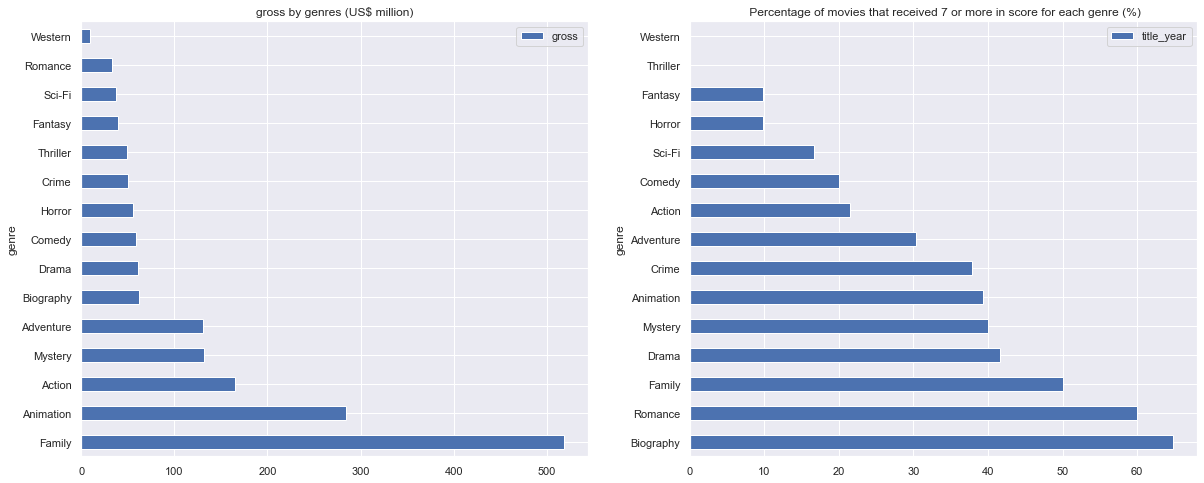

In [42]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')
vis_genre(df_movies)

Text(0.5, 1.0, 'Correlation Heatmap')

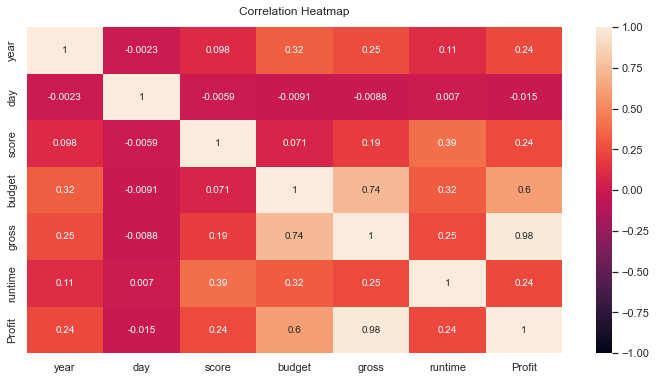

In [43]:
heatmap = sns.heatmap(df_unique.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

From the plot of correlation, we see that most of the features does not have significant correlation with each other, the only features that are highly correlated are gross and budget (excluding Profit since it is based on two of the features). The correlation between gross and budget is 0.74 meaning that a higher budget means in a higher gross for the movie.

---
<a id='prediction'></a>
## Part 3: _<u>Prediction challenge</u>_

<a id='gross'></a>
### 3.1: _<u>The expected revenue (gross)</u>_

For predicting the gross we will use the augmented dataframe. The data will be shuffled to reduce varaince. 

In [42]:
# Load data and remove missing values 
df, df_movies = preprocess_gross('Comprehensive IMDb Data.csv')
df_train = shuffle(df_movies)

Categorical variables will be one-hot encoded or dropped. After iterations of tests we found the optimal combination provided below. 

In [43]:
# Define features and target
X = df_train.drop(["gross"], axis=1)
Y = df_train["gross"]
# One-hot encode
X =pd.get_dummies(X, columns=['genre', 'country'], drop_first=False)

# Standardize and split into train and test set 
x_train, x_test, y_train, y_test = split_stand(X, Y)
x_train, x_test =  binary_features(train = x_train, test = x_test, features = ['company', 'director', 'writer', 'other_cat'], N = 30)
x_train, x_test = binary_features(train = x_train, test = x_test, features = ['actor'], N = 50)

The feature in `list_drop` will not be used in the creating the model due non-importance or they cause data leakage. 

In [44]:
# droping features not used for the predction 
list_drop = ['director1', 'director2', 'knownForTitles', 'day', 'Profit',
 'score', 'category', 'duration', 'region', 'title', 'rating', 'title_year',
 'star', 'primaryName', 'continent', 'writer1', 'released', 'year', 'released_2',
 'writer2', 'nconst','month']

x_train=x_train.drop(list_drop, axis=1)
x_test=x_test.drop(list_drop, axis=1)

In [46]:
models(x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   15.8s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   20.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.2s finished


,4,6,5,1,3,2,0
Model,Gradient Boosting regression,RBF Support vector machine,Random forest,Ridge regression,Elastic net regression,Lasso regression,Simple regression
R2_score,0.607776,0.581761,0.561812,0.5563,0.554812,0.550205,-3557566864409135461433344.0
RMSE,113.342351,117.040901,119.799644,120.550827,120.752716,121.375934,341351591652444.375
MAE,61.486651,57.725942,64.438695,67.506469,67.012647,68.10668,30072333853823.867188
MSE,12846.488515,13698.572414,14351.954594,14532.501989,14581.218327,14732.117439,116520909123657122913565278208.0


The reason for using Ridge regression is that it deals with multicollinearity (independent variables are highly correlated) and lasso ridge regression address the issue further by using different penalty functions. And the use of ElasticNet Regression considers penalty function based on both rigid regression and lasso, and it shows better result compared to rigid regression.

Gridsearch was used beside experimentation with feature selection to find best model parameters and testing out the models we see that Gradiant Boosting regression is the best preforming model interms of R2 score, which is 0.608. We can also see that the RBF Support vector machine and Random forest also performs relatively well. And it is not surprising that the baseline model of imple regression was worse than sufficient. 

<a id='score'></a>
### 3.2: _<u>IMDb score (score)</u>_

For predicting the IMDb scores we have divided the scores into three categories: low, medium and high which constitutes 10%, 80%, 10% of the scores, corresponding to the ranges $]-\infty,5.2]$, $]5.2, 7.5[$, $[7.5,\infty[$. We have chosen to drop some of the attributes considered irrelevant for the classification task and one hot encoded the top 15 values of the following categorical attributes: director, writer, star, company, rating, genre, month, country, duration, continent. 

In [48]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')
train = df_movies

#### SKlearn

For this section we applied PCA and found the number of components needed to explain 75% of the variance in the data is 34 and transformed the data for the classification tasks, comparing Naive Bayes, Logistic Regression, Support Vector Machines, Random Forest, Decision Tree and KNN classification models.

In [49]:
## define features to use 
X = preprocess_score(train)
feature_onehot = ['director','writer','star','company','rating','genre','month','country','duration','continent']
x_train, y_train, x_test, y_test, features, target = score_data_prep_SK(X)

We need at least 34 PC to explane 75% variance.


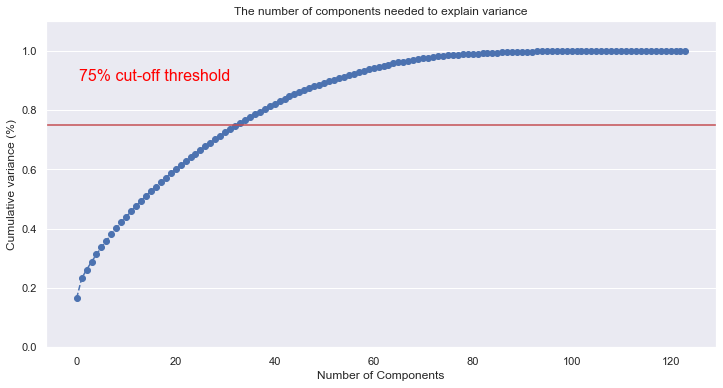

In [50]:
# PCA
pc_comp, x_train_trans, x_test_trans = PCA_score(x_train, x_test)

In [51]:
df_eval, model = optimal_model(x_train_trans, y_train, x_test_trans, y_test)
df_eval

,4,3,0,2,1,5,6
Model,Naive Bayes,Random Forest,Support Vector Machines,Logistic Regression,KNN,Perceptron,Decision Tree
f1_score,0.665891,0.659028,0.657718,0.655701,0.59905,0.595254,0.588934


In [52]:
model_reflection(model, x_test_trans, y_test, features, target, feature_onehot, N=15,PC = pc_comp )

Confusion matrix:
[[  5 130   7]
 [ 24 908  78]
 [  1 142  31]]
              precision    recall  f1-score   support

         low       0.17      0.04      0.06       142
      medium       0.77      0.90      0.83      1010
        high       0.27      0.18      0.21       174

    accuracy                           0.71      1326
   macro avg       0.40      0.37      0.37      1326
weighted avg       0.64      0.71      0.67      1326

The average f1-score is 0.71 for 20 runs.


Using the best performed model (Naive Bayes) we get an average f1 score of 0.71 for 20 runs on our test data. However we can see from the table above that the performance of the model was especially good for the score class medium but not satisfactory for the other two classes, and this is very much likely caused by the class imbalance in our dataset. Therefore, we will also use Artificial Neural Networks structure in attempt to improve our classification by capturing more complex structure within the data and address the class imbalance issue. 

#### ANN

Parts of the analysis is inspired by the tensorflow tutorial of [Classification on imbalanced dataset](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data).

In [106]:
train = preprocess_score(df_movies)

#### Examine class label imbalance

In [107]:
_, low, medium, high = np.bincount(train['score'])
total =low + medium + high
print('Examples:\n    Total: {}\n    low: {} ({:.2f}% of total)\n   medium: {} ({:.2f}% of total)\n     high: {} ({:.2f}% of total)\n'.format(
    total, low, 100 * low / total, medium, 100 * medium / total, high, 100 * high / total))

Examples:
    Total: 5304
    low: 565 (10.65% of total)
   medium: 4090 (77.11% of total)
     high: 649 (12.24% of total)



#### Clean, split and normalize the data

In [108]:
X_train, X_test, X_val, y_train, y_test, y_val, train_labels, test_labels, val_labels = score_data_prep_ANN(train)

#### Define model and metrics 

In [109]:
# Create the ANN model 
EPOCHS = 1000
BATCH_SIZE = 100

model, early_stopping, initial_weights = ANN_create_model()

class_weights = compute_class_weights(low,medium,high,total)
# Training the model
model, baseline_history = ANN_train(model=model, X_train = X_train, train_labels = train_labels, BATCH_SIZE = BATCH_SIZE, 
    EPOCHS =EPOCHS, X_val = X_val, val_labels= val_labels, early_stopping= early_stopping, initial_weights= initial_weights,class_weights = class_weights)


Weight for class low: 4.69
Weight for class medium: 0.65
Weight for class high: 4.09
Epoch 1/1000
30/30 [==============================] - 2s 21ms/step - loss: 1.7031 - tp: 164.0000 - fp: 230.0000 - tn: 5736.0000 - fn: 2819.0000 - accuracy: 0.2585 - precision: 0.4162 - recall: 0.0550 - auc: 0.4083 - prc: 0.3027 - val_loss: 1.2160 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1990.0000 - val_fn: 995.0000 - val_accuracy: 0.1317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.2498 - val_prc: 0.2281
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 1.7067 - tp: 143.0000 - fp: 213.0000 - tn: 5753.0000 - fn: 2840.0000 - accuracy: 0.2494 - precision: 0.4017 - recall: 0.0479 - auc: 0.4013 - prc: 0.2975 - val_loss: 1.2245 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1990.0000 - val_fn: 995.0000 - val_accuracy: 0.1307 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.2440 - val_prc: 0.2276
Epoch 3/1000
30/30 [================

loss :  1.0225210189819336
tp :  802.0
fp :  516.0
tn :  2136.0
fn :  524.0
accuracy :  0.6070889830589294
precision :  0.6084977388381958
recall :  0.6048265695571899
auc :  0.8166430592536926
prc :  0.6528122425079346



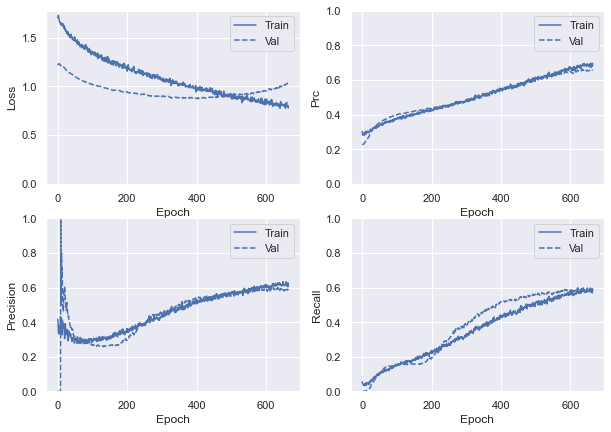

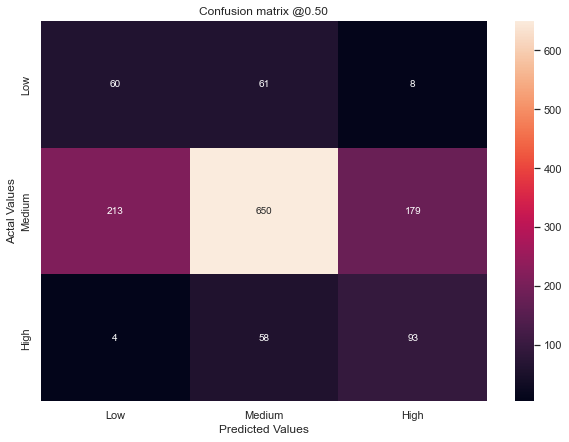

In [110]:
# Evaluation
plot_metrics(baseline_history)

plot_cm(model, X_train, X_test, test_labels, BATCH_SIZE, p=0.5)

In [111]:
ANN_report(model, X_test, test_labels, BATCH_SIZE)

,Precision,Recall,F1-score
low,0.465116,0.123457,0.195122
medium,0.623800,0.845254,0.717835
high,0.600000,0.332143,0.427586


After addressing the class imbalance in the dataset by assigning different class weights has improved the F1 score for both low and high score class predictions. We have also controlled for the batch size so that each batch contains decent number of samples from each class for training. Therefore we have obtained a more reliable model using ANN.

#### Comparison between two prediction tasks

Due to the difference in the nature of the prediction tasks, one being regression and other being classification, different feature engineering techniques have to applied to ensure optimal results. One major difference is the number of features needed where for the gross prediction task there are clearly more features involved and the performance of the models are more feature dependent. Using the same number of features for the IMDb score classification task contributed to higher instability during training and larger uncertainty in classification, thus PCA is used for dimensionality reduction and in general less features were used.

---
<a id='explore'></a>
## Part 4: _<u>Exploratory component</u>_

<a id='q1'></a>
### 4.1: _<u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>_

In this section we would like to investigate whether major world economic crisis have had impact on the success of US movies with focus on particularly two factors: **volume of production** and **profit**. We have selected a list of timestamps of interest that could have played role in the progression of US movie industry: 

* **1980-1982**: Early 1980s recession. 
* **1990-1991**: Early 1990s recession. 
* **2000-2002**: Early 2000s recession. 
* **2007-2009**: Late 2000s recession, including the infamous 2008 world economic crisis.
* **2020**: Covid-19 pandemic.

In [59]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

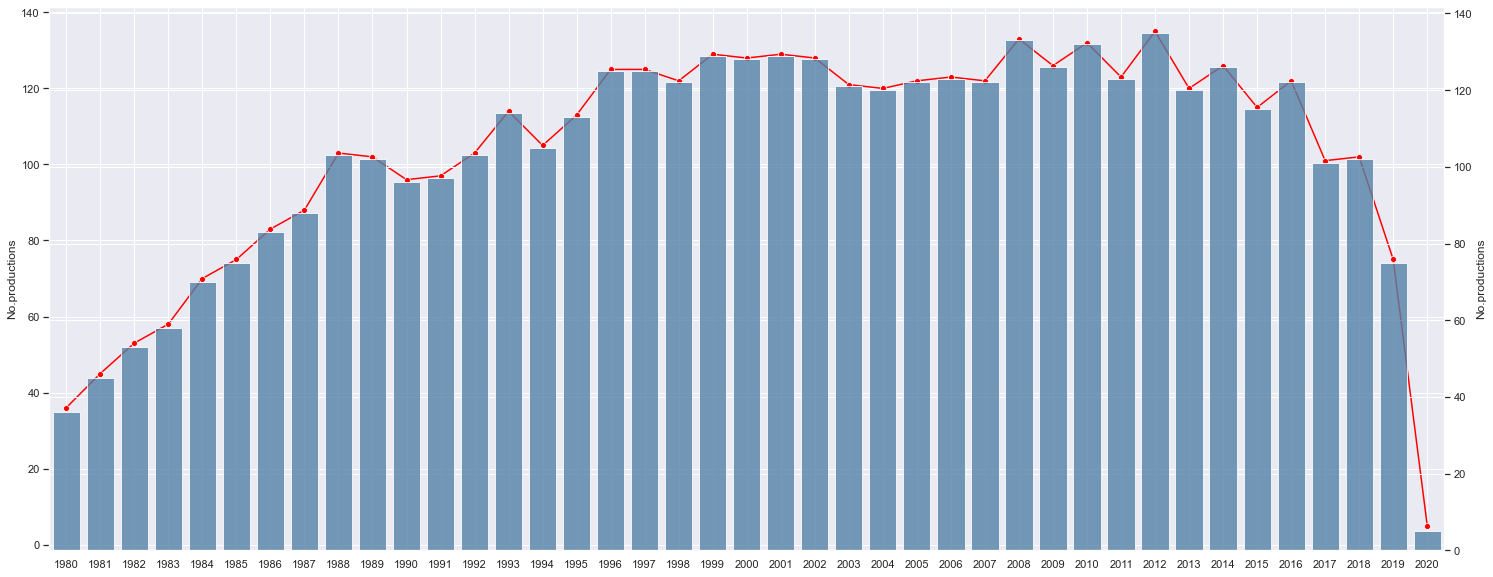

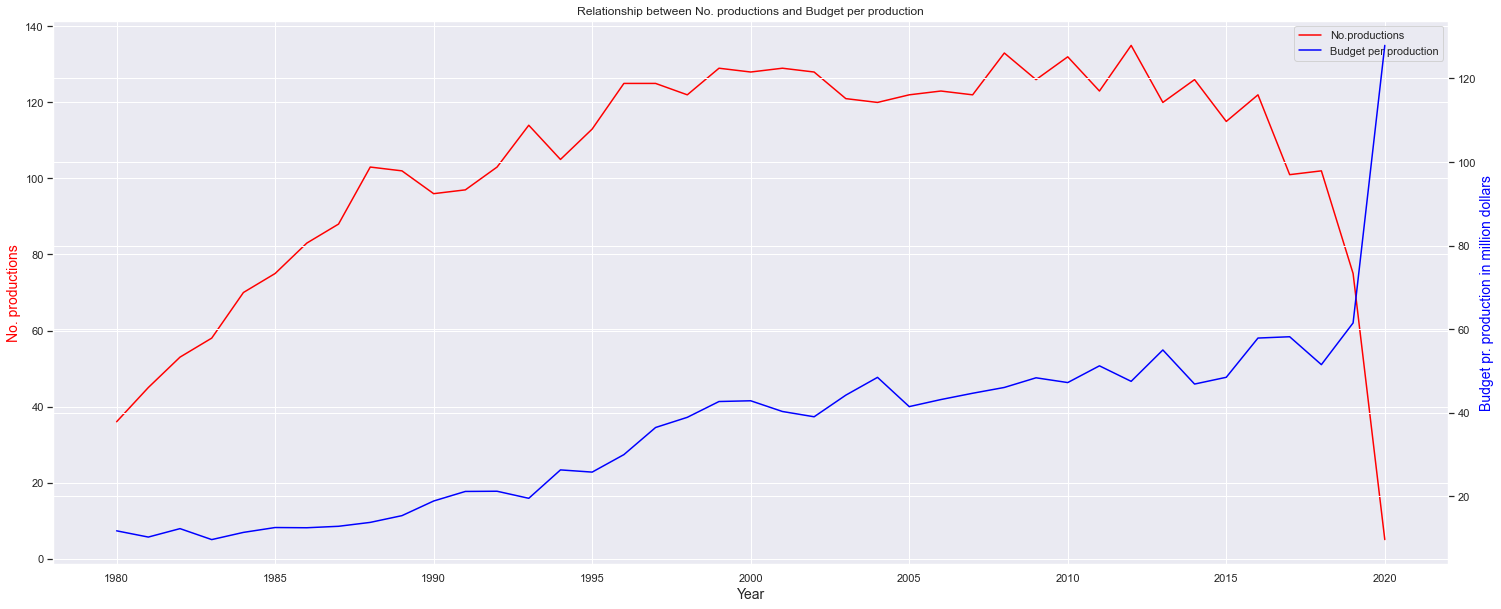

In [60]:
productions(df_movies[df_movies['country'] == 'United States'])

It is not surprising that we see the clear dive in the number of movies produced in 2020, even less than 1980, though it is to note that the data we have only continues until September 2020. This is very much likely caused by the extensive restriction including nationwide lock downs that basically halted physical contacts between people, especially at movie production sites and theatres where lots of people tend to gather. It is even more apparent in the plot showing budget per production where 2020 is the only year that budget spent per production shot up, but much fewer movies were produced compared to the previous years. This corresponds well to the fact that movie production during a pandemic becomes significantly more expensive[costly](https://variety.com/2020/film/news/film-sets-hollywood-pandemic-1234826994/).

We will dive deeper into the box office success to provide a better overview of the impact of recessions. As currency does not stay constant over time, thus the profit, gross and budget values are adjusted for inflation rates using additional data of the US CPI (Customer Product Index) for the period 1980-2020.

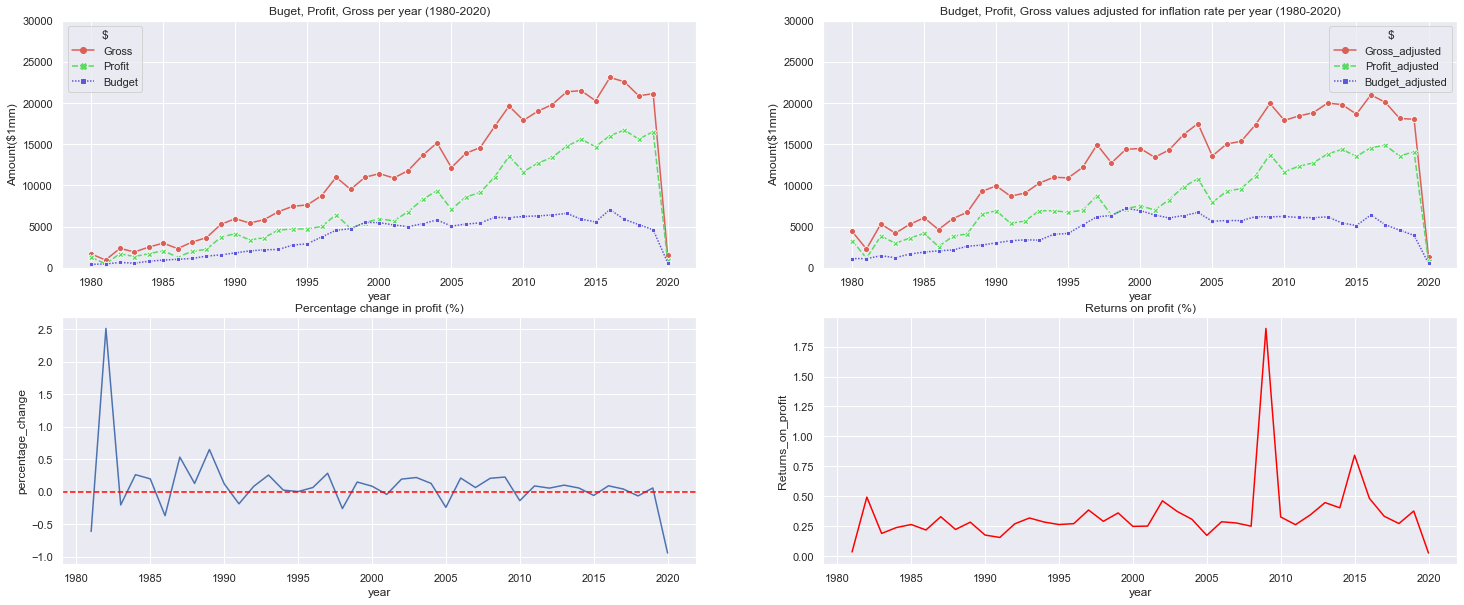

In [61]:
success_visualise(df_movies[df_movies['country'] == 'United States'],'cpi.csv','cpi2.csv')

From the top right plot, we can see dips in profit at year 1981, 1991, 2000 and very drastically at year 2020, which corresponds well to the phases of recessions. This is also reflected in the percentage change in profit plot at bottom left, where the values are negative or close to zero for these years. And we can also see from the bottom right that nearing the end of or 1 to 2 years immediately after the recession periods there tend to be a sharp in crease in return on profits.The time period 2007 to 2009 is especially intriguing as the profit increased from 2007 to 2009, the percentage change in profit stayed positive during the period, and the return of profits shot up from 2008 to 2009 to all time high between 1980 to 2020. Hence, we will further investigate into that period.

,title_year,profit,genre,contribution to profit of the year (%)
3792,Avatar_2009,2610.246203,Action,19.288638
3542,The Dark Knight_2008,820.973645,Action,7.436415
3714,Ice Age: Dawn of the Dinosaurs_2009,796.686817,Animation,5.887186
3776,The Twilight Saga: New Moon_2009,661.025481,Adventure,4.884704
3364,Shrek the Third_2007,653.367380,Animation,7.141745
3361,Spider-Man 3_2007,636.983373,Action,6.962656
3711,Transformers: Revenge of the Fallen_2009,636.303693,Action,4.702021
3523,Indiana Jones and the Kingdom of the Crystal Skull_2008,605.653942,Action,5.486040
3774,2012_2009,591.217826,Action,4.368855
3702,Up_2009,560.099102,Animation,4.138900


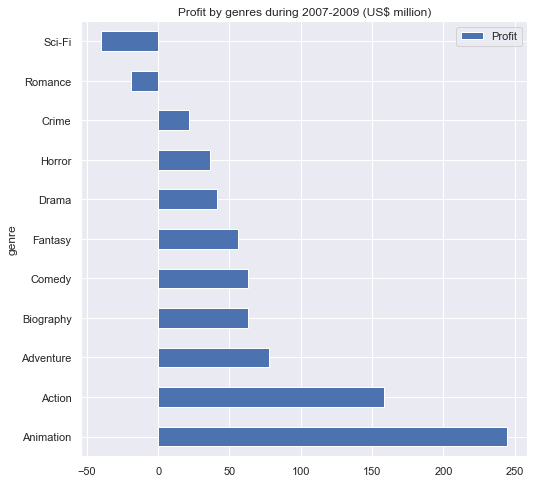

In [62]:
profit_spike(df_movies[df_movies['country'] == 'United States'])

We see that Avatar alone contributed to about 20% of the profit in 2009 and it is the movie that brought the greatest amount of profit over the whole period of 1980 to 2020. This could an important factor that led the observation of spike in return on profit in 2009. Cross referencing with [news](https://www.nytimes.com/2009/03/01/movies/01films.html) from the period of great recession, we find that US movie industry surged with box office success compared to the previous two decades. Explanations of the phenomenon included that people were going to movie theatres as a form of escapism from the harsh reality. And the fact that they needed content that "don't make you think too much" perfectly coincides with the illustration that shows Animation and Action movies contributed significantly more than any other genres to the movie profits during the period. 

<a id='q2'></a>
### 4.2: _<u>How does the underlying structure of movie stars network correlates to the successes of movies?</u>_


In this part of the exploratory component, we wish to investigate groupings of movie stars based on self-defined reputation/star value assessment criteria, which in this case are based on the three factors: **star networth**, **average score of the movies the star has played in**, **average profit of the movies the star was in**. Therefore, we have extracted the average score and profit information from the pre-processed dataset and we further extended the dataset by [web scraping](https://www.celebritynetworth.com/richest-celebrities/actors/networth) values for the stars. 

Two types of analysis are done, Kmeans clustering and Network analysis. 
#### Kmeans clustering
We used only the _average score_ and _average profit_ values for kmeans clustering as we have alot of missing values for star networth as they are hard to find. 5 clusters seemed to be the optimal number where we could clearly see the separation. Below are the plot of clusters and their centroids as well as their relation to the three star-value factors. There seem to be three distinct patterns in the star network, those with average high movie profit, score and networth, those with high average score, but low movie profit and networth, those with low average movie profit, score and networth. We will investigate further by looking at which stars and their associated movies are in the clusters.


In [63]:
extended_dataset = 'df_movies_with_networth.csv'

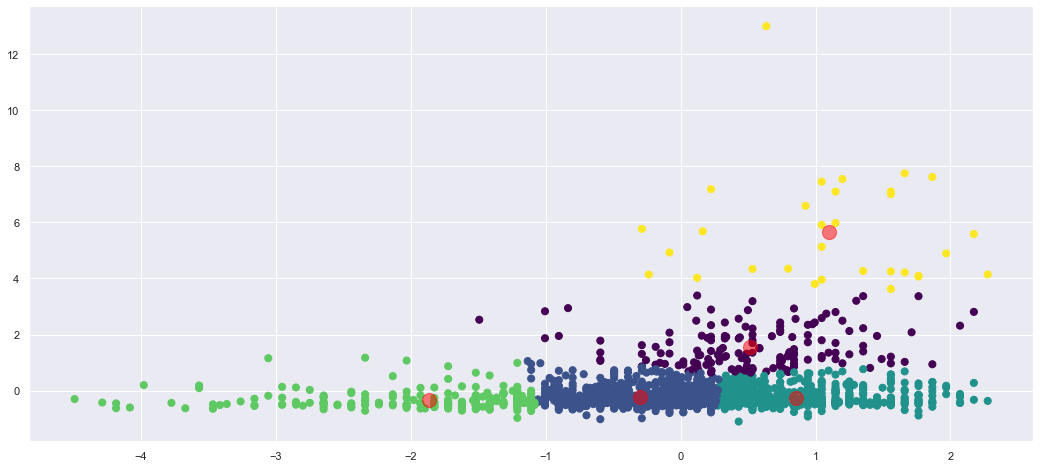

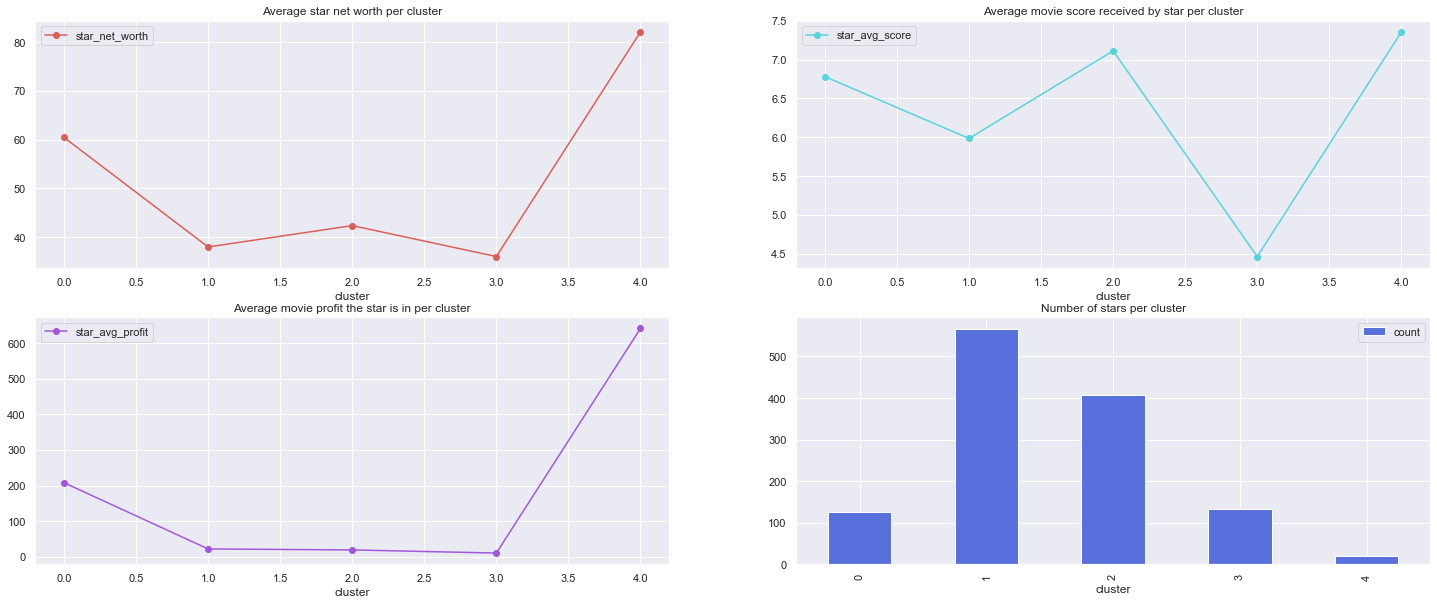

In [64]:
df_star= k_means(extended_dataset)

In [65]:
df_movies[df_movies['star'].isin(list(df_star[df_star['cluster'] == 4].index))][['star','genre','title','score']].head(10)

,star,genre,title,score
16,Mark Hamill,Action,Star Wars: Episode V - The Empire Strikes Back,8.7
126,Henry Thomas,Family,E.T. the Extra-Terrestrial,7.8
193,Mark Hamill,Action,Star Wars: Episode VI - Return of the Jedi,8.3
735,Robert Downey Jr.,Drama,1969,5.8
1080,Robert Downey Jr.,Biography,Chaplin,7.5
1198,Scott Weinger,Animation,Aladdin,8.0
1287,Robert Downey Jr.,Comedy,Heart and Souls,7.0
1474,Robert Downey Jr.,Biography,Restoration,6.6
1757,Robert Downey Jr.,Comedy,Two Girls and a Guy,5.5
2500,Daniel Radcliffe,Adventure,Harry Potter and the Sorcerer's Stone,7.6


From the above table, it is obvious that there are some well-known movie actors in the cluster 4, who have competitively more net worths and can bring higher profits to the movie, such as Robert Downey Jr., Chris Pratt, etc. Their works are also familiar to the public, like 'The Avengers','Jurassic World',etc. Furthermore, their movie scores are relatively higher and most of them are action or animation movies which tend to produce large profits.

In [66]:
df_movies[df_movies['star'].isin(list(df_star[df_star['cluster'] == 3].index))][['star','genre','title','score']].head(10)

,star,genre,title,score
7,Don Adams,Action,The Nude Bomb,5.1
28,Paul Michael Glaser,Drama,Phobia,4.0
44,Lesley-Anne Down,Adventure,Sphinx,5.2
62,Klinton Spilsbury,Action,The Legend of the Lone Ranger,5.1
65,Sylvia Kristel,Comedy,Private Lessons,5.2
66,Laurence Olivier,Action,Clash of the Titans,6.9
77,Bo Derek,Adventure,Tarzan the Ape Man,3.4
83,David Rasche,Action,Honky Tonk Freeway,5.2
85,Laurence Olivier,Drama,Inchon,2.7
96,Andy Kaufman,Comedy,Heartbeeps,4.3


From the above chart, we see that there are relatively low-profile film actors in cluster 3, whom have less net worths and could bring relatively less profit to the film. The genres of these movies are mostly Comedy, Drama etc which tend to give low returns. Despite the film's profit is not high, the film scores are better than expected. It could be they are relatively niche movies, that does not take box office revenue (profit) as the highest goal and cater to the taste and appreciation of the public. The subject matter of the movie tends to be a literary film or a film with some goals to participate in the awards. 


#### Star network analysis

Here we perform network analysis where the stars nodes and they are linked by if they had worked in the same movie. There are in total 1671 nodes and 9024 edges. Thereafter community detection is performed where we found 15 communities.



The Louvain algorithm found 15 communities for the star network.    The modularity is 0.28


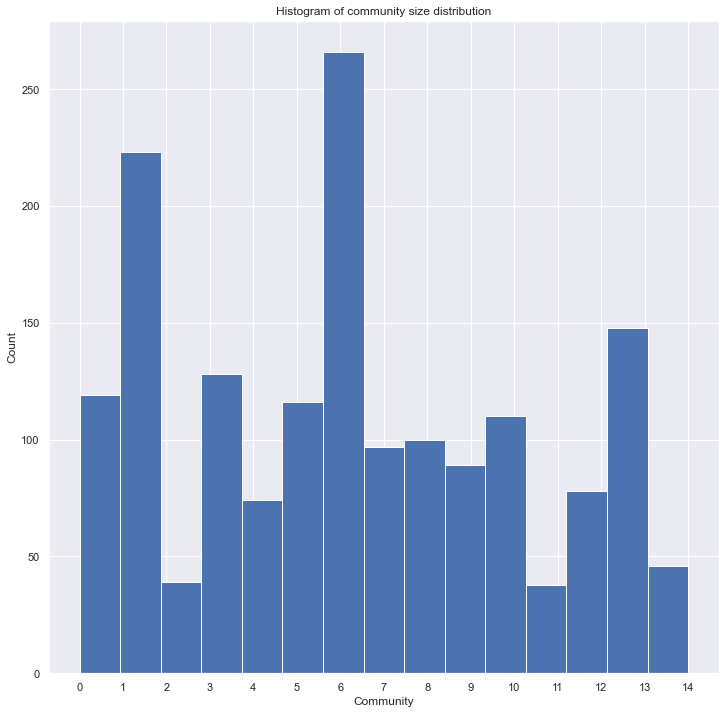

    Community Size
6            266.0
1            223.0
13           148.0
3            128.0
0            119.0


100%|██████████| 1000/1000 [00:57<00:00, 17.36it/s]


BarnesHut Approximation  took  6.87  seconds
Repulsion forces  took  48.89  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.66  seconds


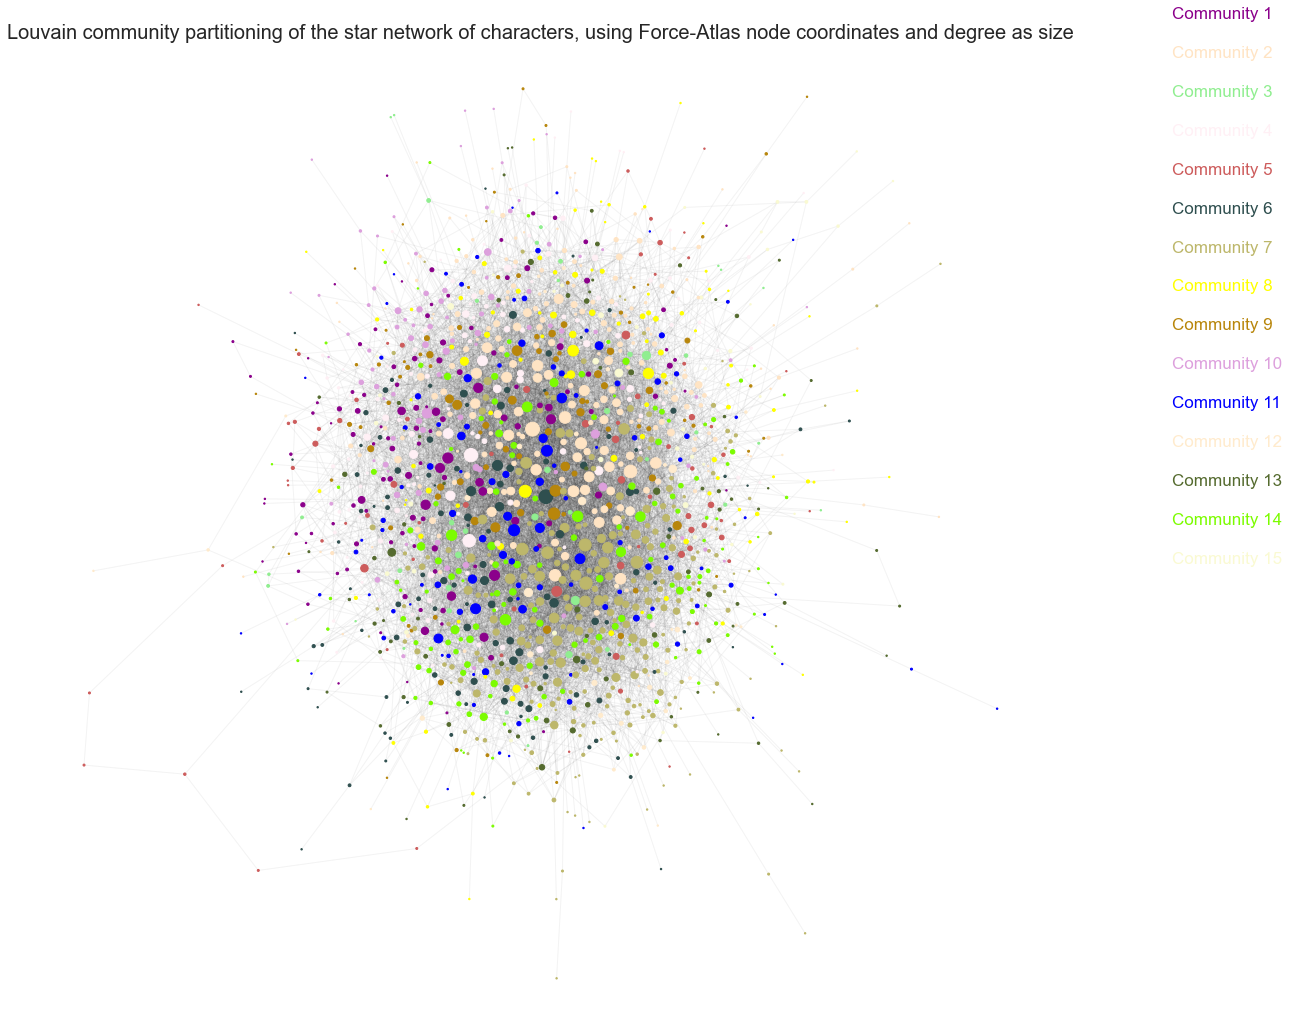

100%|██████████| 1000/1000 [01:07<00:00, 14.91it/s]
C:\Users\hanlu\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


BarnesHut Approximation  took  6.79  seconds
Repulsion forces  took  58.66  seconds
Gravitational forces  took  0.16  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.63  seconds


In [67]:
random.seed(42)
df_movies_nw = pd.read_csv(extended_dataset)
star_graph, star_graph_GCC = create_network(df_movies_nw)
print(star_graph_GCC)
partition = define_community(star_graph_GCC)
display_graph(star_graph_GCC, partition)
inter_graph(star_graph_GCC)

Example of the interactive bokeh visualisation of the network can be seen here. 


 ![title](network.png)


Here we can see that Tom Hanks and Julis Roberts are shown as hubs in the network with many connections (78 and 59) and both have high networth and average profit, which correlates well with the observations found in the kmeans clustering section.

---
<a id='conc'></a>
## Part 5: _<u>Conclusion</u>_

To conclude, in this project we explored various aspects used to describe box office successes of movies with particular focus on those released in the US from 1980 to 2020. Various techniques regarding extending, cleaning, restructuring, subsetting the dataset have been applied, which helped us obtain valuable features and subset of features to successfully predict movie gross and IMDb scores, achieving a $R^{2}$ score of 0.608 and f1-score of 0.2, 0.71, 0.42 for the three score class defined. We further explored the data by examining how major economic crisis have affected the production and financial revenue of US motion picture industry, accounting for inflation rates and relating to actual societal conditions during the periods of crisis. Lastly, we found interesting patterns of movie stars network using information such as movie scores, profit, and stars' net worth. 

## Contribution 

|                                 | Mia  | Hanlu | Atefeh | Jiafei|
|---------------------------------|------|-------|--------|-------|
| Introduction                    | 33 % | 33 %  |        | 33 %  |
| Data analysis and Visualisation | 50 % | 10 %  | 25 %   | 15%   |
| Prediction (gross)              |      |       | 100 %  |       |
| Prediction (score)              | 50 % | 50 %  |        |       |
| Exploratory (Q1)                |      | 100 % |        |       |
| Exploratory (Q2)                | 40 % |       |        | 60 %  |
| Conclusion                      | 33 % | 33 %  |        | 33 %  |

# Appendix

## Library imports

In [4]:
#data analysis libraries 
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import scipy.stats as stats

# ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl


%matplotlib inline

## Data visulisation functions


In [5]:
# Load the dataframe 
def data_add_features(df):

    # Add columns
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    df['Profit'] = df['gross'] - df['budget']

    # Convert budget, gross and profit to of million dollars 
    df['gross'] = df['gross']/1000000
    df['budget'] = df['budget']/1000000
    df['Profit'] = df['Profit']/1000000

    df_unique = df.groupby('title_year').mean()
    df_unique = df_unique.reset_index().rename(columns={'index':'title_year'})

    return df_unique


In [6]:
def vis_gross_score(df):
    plt.rcParams['figure.figsize'] = (12, 6)

    # Gross
    sns.histplot(data=df, x="gross")
    plt.title("Distirubtion of gross")
    plt.xlabel("gross in millions of dollars")
    plt.show()

    # Score
    sns.histplot(data=df, x="score")
    plt.title("Distribution of score")
    plt.show()


In [7]:
def vis_genre(df_movies):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

    df_genre_gross = df_movies.groupby(['genre']).mean().sort_values('gross', ascending=False)
    df_genre_gross[['gross']].plot.barh(stacked=True, title = 'gross by genres (US$ million)', ax = axes[0]) #figsize=(8, 8))
    #plt.show()

    df1 = df_movies[df_movies['score'] >=7]
    df21 = (pd.DataFrame((df1.groupby('genre').title_year.nunique()/(df_movies.groupby('genre').title_year.count()))*100).sort_values('title_year', ascending=False ))
    df21[['title_year']].plot.barh(stacked=True, title = ' Percentage of movies that received 7 or more in score for each genre (%)', ax = axes[1])#figsize=(8, 8))
    
    plt.show()


In [8]:
# From https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side for the plot command
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
def top_movies(df_unique):

    top_profit = df_unique[['title_year','Profit']].sort_values(by = 'Profit', ascending  = False).head(10).reset_index(drop=True)
    top_gross = df_unique[['title_year','gross']].sort_values('gross', ascending= False).reset_index(drop=True)[:10]
    top_score = df_unique[['title_year','score']].sort_values('score', ascending= False).reset_index(drop=True)[:10]

    display_side_by_side(top_profit, top_gross, top_score, titles=['Top 10 profitable movies','Top 10 movies with higest gross', 'Top 10 movies receiving highest score'])


## Preprocess function

In [9]:
def preprocess(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    #titles=list(set(df['title']))
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer = np.unique(df_temp['writer'])
        director = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        known = {}
        for _, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else ([np.nan] if np.all(x!=x) else [np.nanmean(x)]))

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'country', 'budget', 'gross', 'director', 'writer', 'star',
        'company', 'runtime']

    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = df_movies['year'].astype(str) + '_' + df_movies['month'].astype(str)

    ## drop titleId as it is not a useful identifier for the movies 
    df_movies.drop(columns = 'titleId',inplace = True)

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [10]:
from collections import Counter

# Define function for binarization of columns with the top N most commen ones
def binary_features(features, N, train, test):
    for feature in features:
        # Extract information and convert to list 
        list_change = ['primaryName', 'actor', 'other_cat', 'director','writer', 'star']
        if feature in list_change:
            train[feature]= train[feature].apply(lambda x:[g for g in x])
            test[feature]= test[feature].apply(lambda x:[g for g in x])
        else:
            if feature == 'month':
                train['month_'] =  train[feature].apply(lambda x: str(x)).astype(str)
                test['month_'] =  test[feature].apply(lambda x: str(x)).astype(str)
                train.drop(columns=[feature], inplace=True)
                test.drop(columns=[feature], inplace=True)
                feature = 'month_'
            train[feature]= train[feature].apply(lambda x:[x or []])
            test[feature]= test[feature].apply(lambda x:[x or []])

        # Finding top 30 most commen
        c = Counter(sum(train[feature], []))
        N_new = len(c)
        most_N = [x[0] for x in c.most_common(N)]

        # Removing the ones that are not in the top 30
        train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))
        test['temp_N'] = test[feature].apply(lambda x: list(set(most_N) & set(x)))

        # Creat dummies
        dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
        dummies_test = pd.get_dummies(test['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
        dummies_col = dummies.columns
        dummies_test_col = dummies_test.columns 


        # Join back with the original dataframe
        train = train.join(dummies)
        test = test.join(dummies_test)

        # Test if there is missing columns in test and adding it as a column of 0
        missing = list(set(train.columns) - set(test.columns))
        for mis in missing:
            test[mis] =  int(0)

        for col in dummies_col:
            train.loc[train[col].isnull(),col] = int(0)
            test.loc[test[col].isnull(),col] = int(0)

        # Drop the temperary colum
        train.drop(columns=['temp_N'], inplace=True)
        train.drop(columns=[feature], inplace=True)
        test.drop(columns=['temp_N'], inplace=True)
        test.drop(columns=[feature], inplace=True)

    return train, test

In [11]:
from collections import Counter

# Define function for binarization of columns with the top N most commen ones
def binary_features_val(features, N, train, test, val):
    for feature in features:
        # Extract information and convert to list 
        list_chagne = ['primaryName']#, 'actor', 'other_cat', 'director', 'writer']
        if feature in list_chagne:
            train[feature]= train[feature].apply(lambda x:[g for g in x])
            test[feature]= test[feature].apply(lambda x:[g for g in x])
            val[feature]= val[feature].apply(lambda x:[g for g in x])
        else:   
            if feature == 'month':
                train['month_'] =  train[feature].apply(lambda x: str(x)).astype(str)
                test['month_'] =  test[feature].apply(lambda x: str(x)).astype(str)
                val['month_'] =  val[feature].apply(lambda x: str(x)).astype(str)
                train.drop(columns=[feature], inplace=True)
                test.drop(columns=[feature], inplace=True)
                val.drop(columns=[feature], inplace=True)
                feature = 'month_'
            train[feature]= train[feature].apply(lambda x:[x or []])
            test[feature]= test[feature].apply(lambda x:[x or []])
            val[feature]= val[feature].apply(lambda x:[x or []])

        # Finding top 30 most commen
        c = Counter(sum(train[feature], []))
        N_new = len(c)
        most_N = [x[0] for x in c.most_common(N)]

        # Removing the ones that are not in the top 30
        train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))
        test['temp_N'] = test[feature].apply(lambda x: list(set(most_N) & set(x)))
        val['temp_N'] = val[feature].apply(lambda x: list(set(most_N) & set(x)))

        # Creat dummies
        dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
        dummies_test = pd.get_dummies(test['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
        dummies_val = pd.get_dummies(val['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
        dummies_col = dummies.columns
        dummies_test_col = dummies_test.columns 
        dummies_val_col = dummies_val.columns

        # Join back with the original dataframe
        train = train.join(dummies)
        test = test.join(dummies_test)
        val = val.join(dummies_val)
        

        # Test if there is missing columns in test and adding it as a column of 0
        missing = list(set(train.columns) - set(test.columns))
        for mis in missing:
            test[mis] =  int(0)
        missing_val = list(set(train.columns) - set(val.columns))
        for mis in missing_val:
            val[mis] =  int(0)

        for col in dummies_col:
            train.loc[train[col].isnull(),col] = int(0)
            test.loc[test[col].isnull(),col] = int(0)
            val.loc[val[col].isnull(),col] = int(0)


        # Drop the temperary colum
        train.drop(columns=['temp_N'], inplace=True)
        train.drop(columns=[feature], inplace=True)
        test.drop(columns=['temp_N'], inplace=True)
        test.drop(columns=[feature], inplace=True)
        val.drop(columns=['temp_N'], inplace=True)
        val.drop(columns=[feature], inplace=True)

    return train, test,val

## Helper functions

In [12]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    

## Q1 functions

In [13]:
def productions(df_movies):
    temp = df_movies.groupby(['year']).count().rename(columns = {'duration':'No.productions'}).reset_index()
    fig, ax1 = plt.subplots(figsize=(25,10))
    sns.lineplot(data = temp['No.productions'], marker='o', color = '#FF0000',sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = temp, x='year', y='No.productions', alpha=0.8, color = '#4682B4', ax=ax2)
    plt.show()
    temp2 = df_movies.groupby(['year']).sum().reset_index()
    budget_production_ratio = temp2.budget/temp.runtime
    d = {'year': temp.year, 'No.productions': temp.title,'Budget':temp2.budget, 'Budget_per_production': budget_production_ratio}
    df_new = pd.DataFrame(d)

    fig,ax = plt.subplots(figsize=(25,10))
    # make a plot
    l1 = ax.plot(df_new['year'], df_new['No.productions'], label = "No.productions", color = "red")
    # set x-axis label
    ax.set_xlabel("Year",fontsize=14)
    # set y-axis label
    ax.set_ylabel("No. productions",color="red",fontsize=14)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    l2 = ax2.plot(df_new['year'], df_new['Budget_per_production'], label = "Budget per production", color="blue")
    ax2.set_ylabel("Budget pr. production in million dollars",color="blue",fontsize=14)

    # Add legend
    lns = l1+l2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)

    plt.title('Relationship between No. productions and Budget per production')
    plt.show()


In [14]:
def success_visualise(df_movies,inflation,cpi):

    profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Profit']*41}))
    gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Gross']*41}))
    budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Budget']*41}))
    temp2 = pd.concat([gross,profit,budget]).reset_index()

    ## get inflation rate from Comsumer Product Index data for US
    df_cpi = pd.read_csv(inflation,skiprows=3)
    inflation_rate = df_cpi[df_cpi['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'Inflation','index':'year'})
    df_cpi_2= pd.read_csv(cpi,skiprows=3)
    ## cpi base year 2010
    cpi = df_cpi_2[df_cpi_2['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'CPI','index':'year'})
    inf_cpi = inflation_rate.merge(cpi,on='year')

    profit2 = profit.groupby(['year']).sum().reset_index()
    profit2['percentage_change'] = profit2.value.pct_change()
    ## adjust profit for inflation rate using 2010 as base year 
    profit2['profit_adjusted'] = (profit2.value/inf_cpi.CPI.iloc[:-1,])*100
    ## caculate returns in profits / earnings 
    profit2['Returns_on_profit'] = (1+profit2['percentage_change'].iloc[1:,])/(1+inflation_rate.iloc[1:-1,].Inflation)

    ## adjust gross values for inflation rate using 2010 as base year
    gross2 = gross.groupby(['year']).sum().reset_index()
    gross2['gross_adjusted'] = (gross2.value/inf_cpi.CPI.iloc[:-1,])*100

    ## Adjust for budget values for inflation rate using 2010 as base year 
    budget2 = budget.groupby(['year']).sum().reset_index()
    budget2['budget_adjusted'] = (budget2.value/inf_cpi.CPI.iloc[:-1,])*100

    P = profit2.join(pd.DataFrame({'$':['Profit_adjusted']*len(profit2)})).rename(columns = {'profit_adjusted':'Amount($1mm)'})
    G = gross2.join(pd.DataFrame({'$':['Gross_adjusted']*len(gross2)})).rename(columns = {'gross_adjusted':'Amount($1mm)'})
    B = budget2.join(pd.DataFrame({'$':['Budget_adjusted']*len(budget2)})).rename(columns = {'budget_adjusted':'Amount($1mm)'})

    temp3 = pd.concat([G,P,B]).reset_index()
    temp3[['Amount($1mm)','Returns_in_profit']] = temp3[['Amount($1mm)','Returns_on_profit']].apply(pd.to_numeric, errors='coerce', axis=1)

    temp2 = temp2.rename(columns={'value':'Amount($1mm)'})

    fig, ax =plt.subplots(2,2,figsize=(25,10))

    palette = sns.color_palette("hls", 3)

    ax[0,0].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp2,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,0]
    ).set_title('Buget, Profit, Gross per year (1980-2020)')
    ax[0,1].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp3,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,1]
    ).set_title('Budget, Profit, Gross values adjusted for inflation rate per year (1980-2020)')


    sns.lineplot(
        data=profit2,
        x="year", y='percentage_change',
        markers = True, palette=palette,ax = ax[1,0]
    ).set_title('Percentage change in profit (%)')
    ax[1,0].axhline(0, ls='--',color = 'red')

    sns.lineplot(
        data=profit2,
        x="year", y='Returns_on_profit',
        markers = True, color = 'red',ax = ax[1,1]
    ).set_title('Returns on profit (%)')

    # profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).join(pd.DataFrame({'type':['Profit']*len(df_movies)}))
    # gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).join(pd.DataFrame({'type':['Gross']*len(df_movies)}))
    # budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).join(pd.DataFrame({'type':['Budget']*len(df_movies)}))
    # temp2 = pd.concat([gross,profit,budget]).reset_index()
    # palette = sns.color_palette("hls", 3)
    # sns.lineplot(
    #     data=temp2,
    #     x="year", y="value", hue="type", style = 'type',
    #     markers = True, palette=palette
    # )

In [15]:
from IPython.display import display, HTML
def profit_spike(df_movies):
    movie_2007_2009 = df_movies[df_movies['year'].isin([2007,2008,2009])]
    movie_2007_2009.loc[movie_2007_2009['year'] == 2007,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2007].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2007].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2008,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2008].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2008].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2009,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2009].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2009].Profit))*100
    display(HTML(movie_2007_2009[['title_year','Profit','genre','Percent_contribute_profit']].sort_values(by = 'Profit', ascending  = False).head(10).rename(columns = {
        'Profit':'profit','Percent_contribute_profit':'contribution to profit of the year (%)'
    }).to_html()))

    df31 = movie_2007_2009[['title', 'Profit','genre']]
    df41 = movie_2007_2009.groupby(['genre']).mean()
    df41.sort_values('Profit', ascending=False, inplace = True )
    df41[['Profit']].plot.barh(stacked=True, title = 'Profit by genres during 2007-2009 (US$ million)', figsize=(8, 8))
    plt.show()

## Q2 functions

In [16]:
from sklearn.cluster import KMeans

def k_means(file):
    df_star = pd.read_csv(file)
    #Load the extended dataframe contianing star information 
    df_star = df_star.groupby('star').mean()[['star_net_worth','star_avg_score','star_avg_profit']]
    #df_star['star_net_worth'].replace(np.nan,0, inplace = True)

    ## standardize data 
    X = StandardScaler().fit_transform(df_star)
    ## select only the two variables 'average movie score' and 'average movie profit' for each star
    X = X[:,1:]

    K = 5
    k=KMeans(K,random_state=42)
    kmeans = k.fit(X)
    y_kmeans = kmeans.predict(X) 

    plt.rcParams['figure.figsize'] = (18, 8)
    ## plot clusters
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

    ## map it back to original star dataframe 
    df_star['cluster']=k.fit_predict(X)

    pal = sns.color_palette("hls", 8)
    cluster = df_star.groupby('cluster').mean().reset_index()
    cluster2 = df_star.groupby('cluster').count().reset_index().rename(columns = {'star_net_worth':'count'})
    fig,ax = plt.subplots(2,2,figsize=(25,10))
    cluster.plot(x="cluster", y=["star_net_worth"], style='o-', color = pal[0],ax = ax[0,0]).set_title('Average star net worth per cluster')
    cluster.plot(x="cluster", y=["star_avg_score"], style='o-', color = pal[4], ax = ax[0,1]).set_title('Average movie score received by star per cluster')
    cluster.plot(x="cluster", y=["star_avg_profit"], style='o-', color = pal[6], ax = ax[1,0]).set_title('Average movie profit the star is in per cluster')
    cluster2.plot(x="cluster", y=["count"], kind = 'bar', color = pal[5], ax = ax[1,1]).set_title('Number of stars per cluster')

    

    return df_star


## Prediction code

### Gross

In [17]:
def preprocess_gross(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer1 = np.unique(df_temp['writer'])
        director1 = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])
        
        actor = np.unique(df_temp[['primaryName']][df_temp['category'] == 'actor'])
        other_cat = np.unique(df_temp[['primaryName']][df_temp['category'].isin(['archive_sound', 'editor', 'producer', 'production_designer','actress','archive_footage','self'])])
        writer2 = np.unique(df_temp[['primaryName']][df_temp['category'] == 'writer'])
        director2 = np.unique(df_temp[['primaryName']][df_temp['category'] == 'director'])
        
        director11 = np.unique(director1[~pd.isnull(director1)])
        director21 = np.unique(director2[~pd.isnull(director2)])
        
        writer11 = np.unique(writer1[~pd.isnull(writer1)])
        writer21 = np.unique(writer2[~pd.isnull(writer2)])
        
        writer = np.unique(np.concatenate((writer11,writer21),0))
        director = np.unique(np.concatenate((director11,director21),0))

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        known = {}
        for _, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director1':director1,'director2':director2,'director':director,
        'writer1':writer1, 'writer2':writer2,'writer':writer, 'star':star,'actor':actor,'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName,
        'other_cat':other_cat,'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else ([np.nan] if np.all(x!=x) else [np.nanmean(x)]))

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'country', 'budget', 'gross', 'director1', 'writer1', 'star',
        'company', 'runtime']

    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = df_movies['year'].astype(str) + '_' + df_movies['month'].astype(str)

    ## drop titleId as it is not a useful identifier for the movies 
    df_movies.drop(columns = 'titleId',inplace = True)

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [18]:
def score_data_prep_SK_gross(X):
    target = X['score']
    unwanted = ['title_year','titleId','title','primaryName','category','region',
    'released','released_2','day','score','nconst','knownForTitles','year']

    features = X[X.columns[~X.columns.isin(unwanted)]]

    x_train, x_test, y_train, y_test = split_stand(features, target)

    feature_onehot = ['director','writer','star','company','rating','genre','month','country','duration','continent']

    x_train, x_test = binary_features(train = x_train, test = x_test, features = feature_onehot, N = 50)

    return x_train, y_train, x_test, y_test, features, target

In [19]:
## Prediction (Gross) code
# Function to return simple model metrics
def get_model_metrics(X_train, y_train, X_test, y_test, model, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm 
    being used, and returns the training score, the test score (both RMSE), the 
    cross-validated scores and the mean cross-validated score. It also returns the appropriate 
    feature importances depending on whether the optional argument 'parametric' is equal to 
    True or False."""
    
    # I found this function from this https://jazpeng.github.io/predict_movie_ratings/ but I changed it 
    
    model.fit(X_train, y_train)

    train_pred = np.around(model.predict(X_train),1)
    test_pred = np.around(model.predict(X_test),1)
    R2_model = metrics.r2_score(y_test, test_pred)


    RMSE = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
    mean_abs_error = metrics.mean_absolute_error(y_test, test_pred) 
    mean_sqr_error = metrics.mean_squared_error(y_test, test_pred)
    
    
    return model, R2_model, RMSE, mean_abs_error, mean_sqr_error 


In [20]:
# Function to return regularised model metrics
def regularised_model_metrics(X_train, y_train, X_test, y_test, model, grid_params, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm being 
    used and the parameters, and returns the best cross-validated training score, the test 
    score, the best performing model and it's parameters, and the feature importances."""
    
    # I found this function from this https://jazpeng.github.io/predict_movie_ratings/ but I changed it 
    
    gridsearch = GridSearchCV(model, grid_params,
                              n_jobs=-1, cv=5, verbose=1 , scoring='neg_mean_squared_error')
    
    
    gridsearch.fit(X_train, y_train)
    
    best_model = gridsearch.best_estimator_
    test_pred1 = best_model.predict(X_test)
    R2_best_model= metrics.r2_score(y_test,test_pred1)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, best_model.predict(X_test)))
    mean_abs_error = metrics.mean_absolute_error(y_test, test_pred1) 
    mean_sqr_error = metrics.mean_squared_error(y_test, test_pred1)    
    
    
    return best_model , R2_best_model, RMSE, mean_abs_error, mean_sqr_error


In [21]:
def regularised_nonlinear_model_metrics(X_train, y_train, X_test, y_test, model, grid_params):
    """This function takes the train-test splits as arguments, as well as the algorithm being 
    used and the parameters, and returns the best cross-validated training score, the test 
    score, the best performing model and it's parameters, and the feature importances."""
    
    gridsearch = GridSearchCV(model, grid_params,
                              n_jobs=-1, cv=5, verbose=1 , scoring='neg_mean_squared_error')
    
    
    gridsearch.fit(X_train, y_train)
    
    best_model = gridsearch.best_estimator_
    test_pred2 = best_model.predict(X_test)
    R2_best_model= metrics.r2_score(y_test,test_pred2)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, best_model.predict(X_test)))
    mean_abs_error = metrics.mean_absolute_error(y_test, test_pred2) 
    mean_sqr_error = metrics.mean_squared_error(y_test, test_pred2)
      
      
    return best_model , R2_best_model, RMSE, mean_abs_error, mean_sqr_error
    


In [45]:
import pickle

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

from sklearn import linear_model as lm, metrics, tree, ensemble, model_selection as ms, feature_selection, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


def models(x_train, y_train, x_test, y_test):
    
    #simple regression 
    #print('\033[1m' +'Simple regression')
    #print ('\033[0m')
    lm_simple, lm_r2, lm_RMSE, lm_MAE, lm_MSE= get_model_metrics(x_train, y_train, x_test, y_test, lm.LinearRegression())

    #Note: I define a wide variety range for each perameters tuning but it takes more time to solve, So first I used many
    #perameters for my models and run on the data set, and when I  found which is the most effective, I used that.

    #ridge regression
    #print('\033[1m' +'Ridge regression')
    #print ('\033[0m')
    ridge = lm.Ridge()
    # for the first run
    # ridge_params = {'alpha': np.logspace(-10, 10, 10),'fit_intercept': [True, False],
                    #'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    
    # for the next runs inorder to save time I used most effective perameters
    ridge_params = {'alpha': np.logspace(-10, 10, 10),'fit_intercept': [True, False],
                    'solver': ['auto', 'svd', 'sag', 'saga']}
                    
    ridge_model, rlm_r2,rlm_RMSE, rlm_MAE, rlm_MSE = regularised_model_metrics(x_train, y_train, x_test, y_test, ridge, ridge_params)


    #lasso regression
    #print('\033[1m' +'Lasso regression')
    #print ('\033[0m')
    lasso = lm.Lasso()
    lasso_params = {'alpha': np.logspace(-10, 10, 10),'fit_intercept': [True, False]}

    lasso_model, llm_r2,llm_RMSE, llm_MAE, llm_MSE  = regularised_model_metrics(x_train, y_train, x_test, y_test, lasso, lasso_params)
    
    #elastic net regression
    #print('\033[1m' +'Elastic net regression')
    #print ('\033[0m')
    elastic = lm.ElasticNet()
    elastic_params = {'alpha': np.logspace(-10, 10, 10),
                      'l1_ratio':[0.95]}

    #'l1_ratio'=np.linspace(0.05, 0.95, 10)#for saving time I used best l1_ratio
    
    elastic_model, elm_r2, elm_RMSE, elm_MAE, elm_MSE = regularised_model_metrics(x_train, y_train, x_test, y_test, elastic, elastic_params)
    
    #Gradient Boosting regression
    #print('\033[1m' +'Gradient Boosting regression')
    #print ('\033[0m')
    GBR=ensemble.GradientBoostingRegressor()
    # for the first run
    # GBR_params={'n_estimators':[500, 1000, 2000, 3000],'learning_rate':[0.001, 0.01,0.1],'max_depth':[3,4,6],
                 #'subsample':[1],'random_state':[1, 10, 20]}
    # for the next runs inorder to save time I used most effective perameters     
    GBR_params={'n_estimators':[1000],'learning_rate':[0.01],'max_depth':[3,4],
                 'subsample':[1],'random_state':[1, 10]}   
    
    GBR_model, GBR_r2, GBR_RMSE, GBR_MAE, GBR_MSE = regularised_model_metrics(x_train, y_train, x_test, y_test, GBR, GBR_params, parametric=False)
    
    
    #Random forest
    #print('\033[1m' +'Random forest')
    #print ('\033[0m')
    rf, rf_r2, rf_RMSE, rf_MAE, rf_MSE = get_model_metrics(x_train, y_train, x_test, y_test, ensemble.RandomForestRegressor(), parametric=False)
    
    #RBF Support vector machine
    svr = svm.SVR()
    # for the first run
    # svr_params = {'C': np.logspace(-3, 3, 5),'gamma': np.logspace(-4, 1, 5),'kernel': ['rbf']}
    # for the next runs inorder to save time I used most effective perameters   
    svr_params = {'C': [1000],'gamma': np.logspace(-4, 1, 5),'kernel': ['rbf']}
    
    svr, svr_r2, svr_RMSE, svr_MAE, svr_MSE =regularised_nonlinear_model_metrics(x_train, y_train, x_test, y_test, svr, svr_params)
    
    
    models = pd.DataFrame({
        'Model': ['Simple regression', 'Ridge regression', 'Lasso regression', 
                'Elastic net regression', 'Gradient Boosting regression', 'Random forest', 'RBF Support vector machine'],
        'R2_score': [lm_r2, rlm_r2, llm_r2, elm_r2, GBR_r2, rf_r2, svr_r2],
        'RMSE': [lm_RMSE, rlm_RMSE, llm_RMSE, elm_RMSE, GBR_RMSE, rf_RMSE, svr_RMSE],
        'MAE': [lm_MAE, rlm_MAE, llm_MAE, elm_MAE, GBR_MAE, rf_MAE, svr_MAE],
        'MSE': [lm_MSE, rlm_MSE, llm_MSE, elm_MSE, GBR_MSE, rf_MSE, svr_MSE]})
    models = models.sort_values(by='R2_score', ascending=False).T
    
    return models

### Score

In [23]:
def preprocess_score(train):
    # Convert to datetieme
    train['released'] = pd.to_datetime(train['released'],format='%Y-%m-%d')

    # Creating column indicating if it is holidays
    cal = calendar()
    holidays = cal.holidays(start=train.released.min(), end=train.released.max())
    train['Holiday'] = train['released'].isin(holidays).astype(int)

    # Devide the socre into three category: low, medium, and high
    low =np.percentile(train['score'], 10)
    high = np.percentile(train['score'], 90)
    train.loc[train['score'] <= low,'score'] = 1 
    train.loc[(train['score'] > low) & (train['score'] < high),'score']  = 2
    train.loc[train['score'] >= high, 'score']  = 3
    train['score'] = train['score'].astype(int)
    
    train = shuffle(train)
    return train

In [24]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
def split_stand(features, target):
    list_col = list(features.columns)

    ## Splitting the data
    x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.25, random_state=11)

    ## Standarization 
    col_stand = ['score', 'budget', 'gross', 'runtime','Profit']
    for col in col_stand:
        if col in list_col:
            x_mean = x_train.loc[:,col].mean()
            x_std = x_train.loc[:,col].std()

            x_train.loc[:,col] = (x_train.loc[:,col] - x_mean) / x_std
            x_test.loc[:,col] = (x_test.loc[:,col] - x_mean) / x_std

    return x_train, x_test, y_train, y_test

def split_stand_val(features, target):
    list_col = list(features.columns)

    ## Splitting the data
    x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.25,random_state=11)
    x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25,random_state=11)
    
    ## Standarization 
    col_stand = ['score', 'budget', 'gross', 'runtime','Profit']
    for col in col_stand:
        if col in list_col:
            x_mean = x_train.loc[:,col].mean()
            x_std = x_train.loc[:,col].std()

            x_train.loc[:,col] = (x_train.loc[:,col] - x_mean) / x_std
            x_test.loc[:,col] = (x_test.loc[:,col] - x_mean) / x_std
            x_val.loc[:,col] = (x_val.loc[:,col] - x_mean) / x_std

    return x_train, x_test, y_train, y_test, x_val, y_val

In [25]:
def score_data_prep_SK(X):
    target = X['score']
    unwanted = ['title_year','titleId','title','primaryName','category','region',
    'released','released_2','day','score','nconst','knownForTitles','year']

    features = X[X.columns[~X.columns.isin(unwanted)]]

    x_train, x_test, y_train, y_test = split_stand(features, target)

    feature_onehot = ['director','writer','star','company','rating','genre','month','country','duration','continent']

    x_train, x_test = binary_features(train = x_train, test = x_test, features = feature_onehot, N = 15)


    return x_train, y_train, x_test, y_test, features, target

In [26]:
## PCA
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
def PCA_score(x_train, x_test):
    pca=decomposition.PCA()
    pca.fit(x_train)

    y = np.cumsum(pca.explained_variance_ratio_)
    pc_comp = np.where(y >= 0.75)[0][0] + 1
    print(f"We need at least {pc_comp} PC to explane 75% variance.")

    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    plt.ylim(0.0,1.1)
    plt.plot(range(len(y)), y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.75, color='r', linestyle='-')
    plt.text(0.5, 0.90, '75% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

    sklearn_pca = sklearnPCA(n_components=pc_comp)
    x_train_trans = sklearn_pca.fit_transform(x_train)
    x_test_trans = sklearn_pca.fit_transform(x_test)

    return pc_comp, x_train_trans, x_test_trans

In [27]:
def test_optimal(model1, f1_1, model2, f1_2):
    if f1_1 < f1_2:
        return f1_2, model2
    else: 
        return f1_1, model1

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

def optimal_model(x_train, y_train, x_test, y_test):
    # Support Vector Machines
    svc = SVC()
    svc.fit(x_train, y_train)
    ypred_svc = svc.predict(x_test)
    svc_f1 = f1_score(y_test, ypred_svc, average='weighted')
    #print(confusion_matrix(y_test, ypred_svc))
    model = svc

    # Perceptron
    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)
    ypred_per = perceptron.predict(x_test)
    per_f1 = f1_score(y_test, ypred_per, average='weighted')
    #print(confusion_matrix(y_test, ypred_per))
    f1, model = test_optimal(svc, svc_f1, perceptron, per_f1)

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(x_train, y_train)
    ypred_rf = random_forest.predict(x_test)
    rf_f1 = f1_score(y_test, ypred_rf, average='weighted')
    #print(confusion_matrix(y_test, ypred_rf))
    f1, model = test_optimal(model, f1, random_forest, rf_f1)

    # Decision Tree
    DT=DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    ypred_DT = DT.predict(x_test)
    DT_f1 = f1_score(y_test, ypred_DT, average='weighted')
    #print(confusion_matrix(y_test, ypred_DT))
    f1, model = test_optimal(model, f1, DT, DT_f1)

    # K Nearest Neighbor
    knearest = KNeighborsClassifier(n_neighbors=2)
    knearest.fit(x_train, y_train)
    ypred_KNN = knearest.predict(x_test)
    KNN_f1 = f1_score(y_test, ypred_KNN, average='weighted')
    #print(confusion_matrix(y_test, ypred_KNN))
    f1, model = test_optimal(model, f1, knearest, KNN_f1)

    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    gaussian.fit(x_train, y_train)
    ypred_g = gaussian.predict(x_test)
    g_f1 = f1_score(y_test, ypred_g, average='weighted')
    #print(confusion_matrix(y_test, ypred_g))
    f1, model = test_optimal(model, f1, gaussian, g_f1)

    # Logistic Regression
    LogReg = LogisticRegression(solver='liblinear')
    LogReg.fit(x_train, y_train)
    ypred_LogReg = LogReg.predict(x_test)
    LogReg_f1 = f1_score(y_test, ypred_LogReg, average='weighted')
    #print(confusion_matrix(y_test, ypred_LogReg))
    f1, model = test_optimal(model, f1, LogReg, LogReg_f1)
    
    # Reflection on the models' f1-score
    models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
        'f1_score': [svc_f1, KNN_f1, LogReg_f1, 
                rf_f1, g_f1, per_f1, DT_f1]})
    models = models.sort_values(by='f1_score', ascending=False).T
    return models, model


In [29]:
# Model reflection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import statistics

def model_reflection(model, x_test, y_test, X, target, feature_onehot, N,PC):
    y_pred = model.predict(x_test)
    print(f'Confusion matrix:\n{confusion_matrix(y_test,y_pred)}')
    print(classification_report(y_test, y_pred, target_names=['low','medium','high']))

    # run for 100 turns to find the average sensitivity and specificity
    f1_list = []
    n = 20
    for i in range(n):
        list_col = list(X.columns)

        ## Splitting the data
        x_train, x_test, y_train, y_test= train_test_split(X, target, test_size=0.25)

        ## Standarization 
        col_stand = ['score', 'budget', 'gross', 'runtime','Profit']
        for col in col_stand:
            if col in list_col:
                x_mean = x_train.loc[:,col].mean()
                x_std = x_train.loc[:,col].std()

                x_train.loc[:,col] = (x_train.loc[:,col] - x_mean) / x_std
                x_test.loc[:,col] = (x_test.loc[:,col] - x_mean) / x_std


        x_train, x_test = binary_features(train = x_train, test = x_test, features = feature_onehot, N = N) 

        ## PCA 
        sklearn_pca = sklearnPCA(n_components=PC)
        x_train_trans = sklearn_pca.fit_transform(x_train)
        x_test_trans = sklearn_pca.fit_transform(x_test)
        model.fit(x_train_trans, y_train)
        
        ypred = model.predict(x_test_trans)
        precision,recall,fscore,support=score(y_test,ypred,average='weighted')
        f1_list.append(fscore)
    print(f"The average f1-score is {round(statistics.mean(f1_list),3)} for {n} runs.")

In [30]:
def score_data_prep_ANN(train):

    ## define features to use 
    unwanted = ['title_year','titleId','title','primaryName','category','region',
    'released','released_2','day','score','nconst','knownForTitles','year']

    # Finding and one hot encode the features with the top 15 most common
    X= train[train.columns[~train.columns.isin(unwanted)]]
    ## define target variable 
    Y = train.score.values

    # Use a utility from sklearn to split and shuffle your dataset.
    X_train, X_test, y_train, y_test, X_val, y_val = split_stand_val(X,Y)


    feature_onehot = ['director','writer','star','company','rating','genre','month','country','duration','continent']
    X_train, X_test, X_val =  binary_features_val(train = X_train, test = X_test, val = X_val, features = feature_onehot, N = 15)


    # Create categorical labels
    train_labels = to_categorical(y_train)[:,1:]
    test_labels = to_categorical(y_test)[:,1:]
    val_labels = to_categorical(y_val)[:,1:]

    # print('Training labels shape:', train_labels.shape)
    # print('Validation labels shape:', val_labels.shape)
    # print('Test labels shape:', test_labels.shape)

    # print('Training features shape:', X_train.shape)
    # print('Validation features shape:', X_val.shape)
    # print('Test features shape:', X_test.shape)

    return X_train, X_test, X_val, y_train, y_test, y_val,  train_labels, test_labels, val_labels

In [31]:
def ANN_create_model():
    METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

    def make_model(metrics=METRICS, output_bias=None):
        if output_bias is not None:
            output_bias = tf.keras.initializers.Constant(output_bias)
        model = keras.Sequential([
            keras.layers.Dense(
                128, activation='relu',
                input_shape=(X_train.shape[-1],)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(16,activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(3, activation='softmax',
                                bias_initializer=output_bias),
        ])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-4),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=metrics)

        return model

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_prc',
        verbose=1,
        patience=30,
        mode='max',
        restore_best_weights=True)

    model = make_model()

    initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
    model.save_weights(initial_weights)

    return model, early_stopping, initial_weights

In [32]:
def ANN_train(model, X_train, train_labels, BATCH_SIZE, EPOCHS, X_val, val_labels, early_stopping, initial_weights,class_weights):
    model.load_weights(initial_weights)
    baseline_history = model.fit(
        X_train,
        train_labels,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[early_stopping],
        validation_data=(X_val, val_labels),
        class_weight = class_weights)
        
    return model, baseline_history

In [33]:
def compute_class_weights(low,medium,high,total):
    # Scaling by total/2 helps keep the loss to a similar magnitude.
    # The sum of the weights of all examples stays the same.
    weight_for_low = (1 / low) * (total / 2)
    weight_for_medium = (1 / medium) * (total / 2)
    weight_for_high = (1 / high) * (total / 2)

    class_weights = {0: weight_for_low, 1: weight_for_medium, 2:weight_for_high}

    print('Weight for class low: {:.2f}'.format(weight_for_low))
    print('Weight for class medium: {:.2f}'.format(weight_for_medium))
    print('Weight for class high: {:.2f}'.format(weight_for_high))
    return class_weights

In [34]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  plt.figure(figsize=(10,7))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [35]:
def plot_cm(model, X_train, X_test, test_labels, BATCH_SIZE, p=0.5):
  
  train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
  test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

  baseline_results = model.evaluate(X_test, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
  for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
  print()

  cm = confusion_matrix(test_labels.argmax(axis=1), (test_predictions_baseline > p).argmax(axis=1))
  cm_df = pd.DataFrame(cm,
                     index = ['Low','Medium','High'], 
                     columns = ['Low','Medium','High'])
  plt.figure(figsize=(10,7))
  sns.heatmap(cm_df, annot=True,fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

In [36]:
def ANN_report(model, X_test, test_labels, BATCH_SIZE):
    test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)
    cm = confusion_matrix(test_labels.argmax(axis=1), (test_predictions_baseline > 0.5).argmax(axis=1))

    # Getting TP and FP for each class
    TP_l = cm[0][0]
    FP_l = cm[0][1] + cm[0][2]
    FN_l = cm[1][0] + cm[1][0]
    TP_m = cm[1][1]
    FP_m = cm[1][0] + cm[1][2]
    FN_m = cm[0][1] + cm[2][1]
    TP_h = cm[2][2]
    FP_h = cm[2][0] + cm[2][1]
    FN_h = cm[0][2] + cm[1][2]

    # Compute precision 
    pre_l = TP_l/(TP_l + FP_l)
    pre_m = TP_m/(TP_m + FP_m)
    pre_h = TP_h/(TP_h + FP_h)
    precision = [pre_l, pre_m, pre_h]

    # Compute recall 
    re_l = TP_l/(TP_l + FN_l)
    re_m = TP_m/(TP_m + FN_m)
    re_h = TP_h/(TP_h + FN_h)
    recall = [re_l, re_m, re_h]

    # Compute f-1 Score
    f1_l = (2*pre_l*re_l)/(pre_l + re_l)
    f1_m = (2*pre_m*re_m)/(pre_m + re_m)
    f1_h = (2*pre_h*re_h)/(pre_h + re_h)
    f1 = [f1_l, f1_m, f1_h]


    df_report = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score':f1}, 
    index=['low', 'medium', 'high'])

    return df_report


## Extending the dataset

In [37]:
## extracting the net worth for stars 
import re
def extend_networth(df_movies):
    # The url for extracting the net worth 
    base = 'https://www.celebritynetworth.com/richest-celebrities/actors/'
    pattern = r'(?<=net worth of \$).*?(?= million)'

    ## Initailize dictionary to save the data
    net_worth = {}

    for name in set(df_movies['star']):
        title = name.replace(" ", "-") + '-net-worth/'
        URL = base + title

        page = requests.get(URL)
        soup = BeautifulSoup(page.content, "html.parser")
        worth = re.search(pattern, str(soup.p))
        if worth:
            if len(worth.group()) < 10:
                net_worth[name] = worth.group()
            else:
                net_worth[name] = None
        else:
            net_worth[name] = None
    print(f"There are in total {len(net_worth.keys())} unique star and {sum(x is None for x in list(net_worth.values()))} does not have a net worth.")
    
    ## Finding the average score for stars 
    dict_avg_score = df_movies.groupby('star').mean()['score'].to_dict()
    dict_avg_profit = df_movies.groupby('star').mean()['Profit'].to_dict()

    # Adding the values to the dataframe 
    df_movies['star_net_worth'] = df_movies['star'].apply(lambda x: net_worth.get(x))
    df_movies['star_avg_score'] = df_movies['star'].apply(lambda x: dict_avg_score.get(x))
    df_movies['star_avg_profit'] = df_movies['star'].apply(lambda x: dict_avg_profit.get(x))

    ## Saving the dataframe to a csv
    df_movies.to_csv("df_movies_with_networth.csv", index=False)

    return df_movies

## Network 


In [38]:
import networkx as nx

def create_network(df_movies_nw):
    ## Initialization 
    star_graph = nx.Graph()
    all_star = set(df_movies_nw['star'])

    for _, row  in df_movies_nw.iterrows():
        star = row['star']
        avg_score = row['star_avg_score']
        net_wroth = row['star_net_worth'] 
        avg_profit = row['star_avg_profit']

        # Convert the primaryName to a list only if it is loaded from a csv

        ## Only if we load from csv
        pN = row['primaryName'].replace('\n', '').replace('"', '').replace("[","").replace("]","")
        pN = pN.split("' ")
        primaryName = list(map(lambda item: item.replace("'",""), pN))
        #primaryName = row['primaryName']

        ## Add the star and the attribute 
        star_graph.add_node(star, avg_score = avg_score, avg_profit = avg_profit, net_worth = net_wroth)

        ## Add edges to the graph connecting to the star
        for name in primaryName:
            if (name in all_star) & (name != star):
                star_graph.add_edge(star, name)

    ## Creating the Giant Connected Components
    CCs_list = sorted(nx.connected_components(star_graph), key=len, reverse=True)

    # Extract the largest connected graph and convert it to undirected
    star_graph_GCC = star_graph.subgraph(CCs_list[0]).copy()
    return star_graph, star_graph_GCC
 

In [39]:
import community
from importlib import reload 
reload(community)
def define_community(graph):
    partition = community.best_partition(graph)
    print(f"The Louvain algorithm found {len(set(partition.values()))} communities for the star network.\
    The modularity is {community.modularity(partition, graph):.2f}")

    plt.figure(figsize = [12, 12])
    freq = plt.hist(partition.values(), bins = len(set(partition.values())))
    community_size = pd.DataFrame(freq[0])
    plt.xticks(range(len(set(partition.values()))))
    plt.title('Histogram of community size distribution')
    plt.xlabel('Community')
    plt.ylabel('Count')
    plt.show()

    community_size.rename(columns = {0:'Community Size'}, inplace = True) #renaming column
    community_size.sort_values(by='Community Size', ascending = False)[0:5]
    com_5_largest = community_size.sort_values(by='Community Size', ascending = False)[0:5]
    print(com_5_largest)

    return partition


In [40]:
from fa2 import ForceAtlas2
import random
# Infomap 
from infomap import Infomap
im = Infomap(silent=True)

def display_graph(star_graph_GCC, partition):
    from matplotlib import colors
    # Visulization based on gender and role 
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            outboundAttractionDistribution=False,  # Dissuade hubs
                            edgeWeightInfluence=1.0,

                            # Performance
                            jitterTolerance=1.0,  # Tolerance
                            barnesHutOptimize=True,
                            barnesHutTheta=1.2,

                            # Tuning
                            scalingRatio=10.0,
                            strongGravityMode=False,
                            gravity=0.5,

                            # Log
                            verbose=True)


    dict_communities = {}

    for community_nr in range(0, max(partition.values()) + 1):
        dict_communities[community_nr] = [name for name, comm in partition.items() if comm == community_nr]

    all_colors_dict = dict(colors.CSS4_COLORS)
    character_color_dict = {}
    community_color_list = []

    for community_nr, character_name_list in dict_communities.items():
        
        # Choose a random color entry
        color_k = random.randint(0, len(all_colors_dict) - 1)
        
        # Retrieve the color HEX for that random color
        color = all_colors_dict[list(all_colors_dict)[color_k]]
        
        # Remove the color already chosen by one community, so that we don't end up with duplicate colors by accident
        all_colors_dict.pop(list(all_colors_dict)[color_k])
        
        # For every node in this community, we assign them the previously-computed random color
        for character_name in character_name_list:
            character_color_dict[character_name] = color
        
        # Preserve the HEX color of the community, for future plotting
        community_color_list.append(color)

    # Setting node size based on degree
    node_size = [val*2 for (_, val) in star_graph_GCC.degree()]
    colors = [character_color_dict[node] for node in star_graph_GCC]

    plt.figure(figsize = [18, 18])
    #fig, ax = plt.subplots()
    positions = forceatlas2.forceatlas2_networkx_layout(star_graph, pos=None, iterations=1000)
    nx.draw_networkx_nodes(star_graph_GCC, positions, node_size=node_size, node_color=colors, alpha=1)
    nx.draw_networkx_edges(star_graph_GCC, positions, alpha=0.05, arrows=False)
    #fig.set_facecolor('white')
    plt.axis('off')

    y = 0.90 # This is the starting Y, for the figure text
    # Indicating community colors
    for i in range(0, len(dict_communities)):
        plt.figtext(1, y, str('Community ' + str(i + 1)), size = 17, color = community_color_list[i])
        y = y - 0.03

    plt.title("Louvain community partitioning of the star network of characters, using Force-Atlas node coordinates and degree as size", fontsize=20)

    plt.show()
    


In [41]:
from fa2 import ForceAtlas2
import random
from bokeh.io import output_notebook, show, save, output_file
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

def inter_graph(star_graph_GCC):
    from matplotlib import colors
    # Infomap 
    from infomap import Infomap
    im = Infomap(silent=True)
    
    ## adding degree as an attribute
    degrees = dict(nx.degree(star_graph_GCC))
    nx.set_node_attributes(star_graph_GCC, name='degree', values=degrees)

    ## Adjusting the node size to be based on the degree 
    number_to_adjust_by = 3
    adjusted_node_size = dict([(node, degree*0.3 + number_to_adjust_by) for node, degree in nx.degree(star_graph_GCC)])
    nx.set_node_attributes(star_graph_GCC, name='adjusted_node_size', values=adjusted_node_size)

    all_colors_dict = dict(colors.CSS4_COLORS)
    community_class = {}
    community_color = {}
    dict_community = {}
    ## Loop through each community in the network 
    for nr in range(0, max(partition.values()) + 1):
        dict_community[nr] = [name for name, comm in partition.items() if comm == nr]

    for nr, character_list in dict_community.items():

        # Choose a random color entry
        color_k = random.randint(0, len(all_colors_dict) - 1)
        
        # Retrieve the color HEX for that random color
        color = all_colors_dict[list(all_colors_dict)[color_k]]
        
        # Remove the color already chosen by one community, so that we don't end up with duplicate colors by accident
        all_colors_dict.pop(list(all_colors_dict)[color_k])

        # Add the individuale community number and color for each node 
        for node in character_list:
            community_class[node] = nr
            community_color[node] = color

    # Create empty dictionaries
    modularity_class = {}
    modularity_color = {}
    #Loop through each community in the network
    for community_number, community in enumerate(partition):
        #For each member of the community, add their community number and a distinct color
        for name in community: 
            modularity_class[name] = community_number
            #modularity_color[name] = Spectral8[community_number]

    ################################ TEST#########################3
    nx.set_node_attributes(star_graph_GCC, name='community_class', values=community_class)
    nx.set_node_attributes(star_graph_GCC, name='community_color', values=community_color)


    #Choose colors for node and edge highlighting
    node_highlight_color = 'white'
    edge_highlight_color = 'black'

    #Choose attributes from network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
    size_by_this_attribute = 'adjusted_node_size'
    color_by_this_attribute = 'community_color'

    #Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
    color_palette = Blues8

    #Choose a title!
    title = 'Star Network'

    #Establish which categories will appear when hovering over each node
    HOVER_TOOLTIPS = [
        ("Character", "@index"),
            ("Degree", "@degree"),
            ("Net worth", "@net_worth"),
            ("Average score", "@avg_score"),
            ("Average profit", "@avg_profit"),
            ("Community", "@community_class"),
            ("Community Color", "$color[swatch]:community_color"),
    ]

    #Create a plot — set dimensions, toolbar, and title
    plot = figure(tooltips = HOVER_TOOLTIPS,
                tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                x_range=Range1d(-500.1, 500.1), y_range=Range1d(-500.1, 500.1), title=title)

    forceatlas2 = ForceAtlas2(
            # Behavior alternatives
            outboundAttractionDistribution=False,  # Dissuade hubs
            edgeWeightInfluence=1.0,

            # Performance
            jitterTolerance=1.0,  # Tolerance
            barnesHutOptimize=True,
            barnesHutTheta=1.2,

            # Tuning
            scalingRatio=1.0,
            strongGravityMode=False,
            gravity=0.5,

            # Log
            verbose=True)
    positions = forceatlas2.forceatlas2_networkx_layout(star_graph, pos=None, iterations=1000)

    #Create a network graph object
    # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
    network_graph = from_networkx(star_graph_GCC, positions, scale=1, center=(0, 0))


    #Set node sizes and colors according to node degree (color as category from attribute)
    network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
    #Set node highlight colors
    network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
    network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

    #Set edge opacity and width
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.2, line_width=1)
    #Set edge highlight colors
    network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
    network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

        #Highlight nodes and edges
    network_graph.selection_policy = NodesAndLinkedEdges()
    network_graph.inspection_policy = NodesAndLinkedEdges()

    plot.renderers.append(network_graph)

    output_file("interactive_graphs.html")
    show(plot)
